In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
df = pd.read_csv("./data/PECVD_PROCESS.csv")
df.head()

,EQUIPMENTID,SUBEQUIPMENTID,JobNo,StepNumber,DataVar_Recipe,N2_MPressure,SiH4_Pressure,NH3_Pressure,N2O_Pressure,BoatID,...,VacuumPressurePVmilliTorr,VacuumPressurePV,StepName,SITEID,TubeID,ArcCount,Alarm1,Alarm2,Alarm3,Warning
0,JC02-AR-18,JC02-AR-18-MP-TUBE03,60149,40,SL-F09_002,49.900002,33.500000,43.599998,42.0,107,...,10000,766.000000,NaN,9012C,3,0,NaN,NaN,NaN,NaN
1,JC02-AR-18,JC02-AR-18-MP-TUBE03,60149,40,SL-F09_002,49.900002,33.500000,43.599998,42.0,107,...,10000,766.000000,NaN,9012C,3,0,NaN,NaN,NaN,NaN
2,JC02-AR-18,JC02-AR-18-MP-TUBE03,60149,40,SL-F09_002,49.900002,33.599998,43.599998,42.0,107,...,10000,765.900024,NaN,9012C,3,0,NaN,NaN,NaN,NaN
3,JC02-AR-18,JC02-AR-18-MP-TUBE03,60149,40,SL-F09_002,49.900002,33.599998,43.599998,42.0,107,...,10000,765.900024,NaN,9012C,3,0,NaN,NaN,NaN,NaN
4,JC02-AR-18,JC02-AR-18-MP-TUBE03,60149,40,SL-F09_002,49.900002,33.599998,43.599998,42.0,107,...,10000,766.000000,NaN,9012C,3,0,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['EQUIPMENTID', 'SUBEQUIPMENTID', 'JobNo', 'StepNumber',
       'DataVar_Recipe', 'N2_MPressure', 'SiH4_Pressure', 'NH3_Pressure',
       'N2O_Pressure', 'BoatID',
       ...
       'VacuumPressurePVmilliTorr', 'VacuumPressurePV', 'StepName', 'SITEID',
       'TubeID', 'ArcCount', 'Alarm1', 'Alarm2', 'Alarm3', 'Warning'],
      dtype='object', length=109)

In [9]:
df.isna().sum()

EQUIPMENTID           0
SUBEQUIPMENTID        0
JobNo                 0
StepNumber            0
DataVar_Recipe        0
                  ...  
ArcCount              0
Alarm1            11402
Alarm2            11442
Alarm3            11442
Warning           11442
Length: 109, dtype: int64

### Data Preprocessing - Step

In [8]:
# choice_col = ['JobNo', 'StepNumber', 'N2_MPressure', 'SiH4_Pressure', 'NH3_Pressure']
step_col = ['JobNo', 'StepNumber', 'N2_MPressure', 'SiH4_Pressure', 'NH3_Pressure']
df_step = df[step_col]
df_step.head()

,JobNo,StepNumber,N2_MPressure,SiH4_Pressure,NH3_Pressure
0,60149,40,49.900002,33.500000,43.599998
1,60149,40,49.900002,33.500000,43.599998
2,60149,40,49.900002,33.599998,43.599998
3,60149,40,49.900002,33.599998,43.599998
4,60149,40,49.900002,33.599998,43.599998


In [10]:
step_count = df_step.groupby(['JobNo', 'StepNumber']).count().sort_values(['JobNo', 'StepNumber'])
step_count.rename(columns={'N2_MPressure':'StepCount'}, inplace=True)
step_count.head(30)

StepCount  SiH4_Pressure  NH3_Pressure
JobNo StepNumber                                        
0     40                307            307           307
60149 1                   5              5             5
      2                 128            128           128
      3                 109            109           109
      4                 168            168           168
      5                 304            304           304
      6                 172            172           172
      7                 384            384           384
      8                  69             69            69
      10                 30             30            30
      11                 10             10            10
      12                  9              9             9
      13                 10             10            10
      14                  5              5             5
      15                  9              9             9
      16                  5              5             5
      40                 69             69            69
60151 2                 118            118           118
      3                  79             79            79
      4                  96             96            96
      5                 249            249           249
      6                 167            167           167
      7                 385            385           385
      8                  69             69            69
      10                 29             29            29
      11                 10             10            10
      12                  9              9             9
      13                 10             10            10
      14                  5              5             5
      15                 10             10            10

In [13]:
step_count_sum = step_count.groupby('JobNo').cumsum()
step_count_sum.rename(columns={'StepCount':'StepCountSum'}, inplace=True)
step_count_sum.head()

StepCountSum
JobNo StepNumber              
0     40                   307
60149 1                      5
      2                    133
      3                    242
      4                    410

In [14]:
df_step_final = pd.concat([step_count ,step_count_sum], axis=1)
df_step_final.head()

StepCount  StepCountSum
JobNo StepNumber                         
0     40                307           307
60149 1                   5             5
      2                 128           133
      3                 109           242
      4                 168           410

### Data Preprocessing - Alarm

In [15]:
alarm_col = ['JobNo', 'StepNumber','Alarm1']
df_alarm = df[alarm_col]
df_alarm.rename(columns={'Alarm1':'AlarmCode'}, inplace=True)
df_alarm.loc[:,'AlarmCode'] = df_alarm.loc[:,'AlarmCode'].fillna(0)

In [16]:
df_alarm.loc[:,'startIndex'] = df_alarm.loc[:,'AlarmCode'].str.find('[',0)
df_alarm.loc[:,'endIndex'] = df_alarm.loc[:,'AlarmCode'].str.find(']',0)
df_alarm.head()

,JobNo,StepNumber,AlarmCode,startIndex,endIndex
0,60149,40,0,NaN,NaN
1,60149,40,0,NaN,NaN
2,60149,40,0,NaN,NaN
3,60149,40,0,NaN,NaN
4,60149,40,0,NaN,NaN


In [17]:
df_alarm.loc[:,'startIndex'].fillna(0, inplace=True)
df_alarm.loc[:,'endIndex'].fillna(0, inplace=True)
df_alarm.head()

,JobNo,StepNumber,AlarmCode,startIndex,endIndex
0,60149,40,0,0.0,0.0
1,60149,40,0,0.0,0.0
2,60149,40,0,0.0,0.0
3,60149,40,0,0.0,0.0
4,60149,40,0,0.0,0.0


In [18]:
for i in range(len(df_alarm)):
    if (df_alarm.loc[i,'startIndex']) != 0:
        df_alarm.loc[i,'AlarmCode'] = df_alarm.loc[i,'AlarmCode'][int(df_alarm.loc[i,'startIndex']+1) : int(df_alarm.loc[i,'endIndex'])]
df_alarm.drop(labels=['startIndex', 'endIndex'], axis=1, inplace=True)
df_alarm.head() 

,JobNo,StepNumber,AlarmCode
0,60149,40,0
1,60149,40,0
2,60149,40,0
3,60149,40,0
4,60149,40,0


In [19]:
for i in range(len(df_alarm)):
    if df_alarm.loc[i,'AlarmCode'] != 0:
        df_alarm.loc[i,'AlarmFlag'] = 1
    else:
        df_alarm.loc[i,'AlarmFlag'] = 0
df_alarm.loc[:,'AlarmFlag'] = df_alarm.loc[:,'AlarmFlag'].astype(int)
df_alarm.head()      

,JobNo,StepNumber,AlarmCode,AlarmFlag
0,60149,40,0,0
1,60149,40,0,0
2,60149,40,0,0
3,60149,40,0,0
4,60149,40,0,0


In [20]:
df_alarm_no_dupl = df_alarm.copy()
df_alarm_no_dupl = df_alarm_no_dupl.drop_duplicates(['JobNo', 'StepNumber', 'AlarmCode'])
df_alarm_no_dupl.loc[:,'AlarmCode'] = df_alarm_no_dupl.loc[:,'AlarmCode'].astype(int)
df_alarm_final = df_alarm_no_dupl.groupby(['JobNo', 'StepNumber']).sum().sort_values(['JobNo', 'StepNumber'])
df_alarm_final.head()

AlarmCode  AlarmFlag
JobNo StepNumber                      
0     40                  0          0
60149 1                  50          1
      2                  50          1
      3                  50          1
      4                   0          0

In [21]:
df_final = pd.concat([df_step_final,df_alarm_final], axis=1)
df_final.head()

StepCount  StepCountSum  AlarmCode  AlarmFlag
JobNo StepNumber                                               
0     40                307           307          0          0
60149 1                   5             5         50          1
      2                 128           133         50          1
      3                 109           242         50          1
      4                 168           410          0          0

In [23]:
df_final.to_csv("problem3_result2.csv", index=True)

In [31]:
df_final_fig = df_final.copy()
df_final_fig.reset_index(level=1, inplace=True)
df_final_fig.head()

,StepNumber,StepCount,StepCountSum,AlarmCode,AlarmFlag
JobNo,,,,,
0,40,307,307,0,0
60149,1,5,5,50,1
60149,2,128,133,50,1
60149,3,109,242,50,1
60149,4,168,410,0,0


In [32]:
drop_row = []
step_num = 40
step_num_special = 30
job_num = -1

for i in range(len(df_final_fig)):
    if df_final_fig.iloc[i,0]== step_num_special:
        drop_row.append(i)
    if df_final_fig.index[i] == job_num and df_final_fig.iloc[i,0]== step_num:
        drop_row.append(i)
    if df_final_fig.iloc[i,4] == 1:
        job_num = df_final_fig.index[i]

In [33]:
idx = pd.Series(data=np.arange(0,len(df_final_fig)))
df_final_fig = df_final_fig.set_index([idx, df_final_fig.index])
df_final_fig = df_final_fig.drop(df_final_fig.index[drop_row])
df_final_fig.reset_index(level=0, inplace=True)
df_final_fig.drop(columns=['level_0'], axis=1, inplace=True)
df_final_fig.head()

,StepNumber,StepCount,StepCountSum,AlarmCode,AlarmFlag
JobNo,,,,,
0,40,307,307,0,0
60149,1,5,5,50,1
60149,2,128,133,50,1
60149,3,109,242,50,1
60149,4,168,410,0,0


<IPython.core.display.Javascript object>


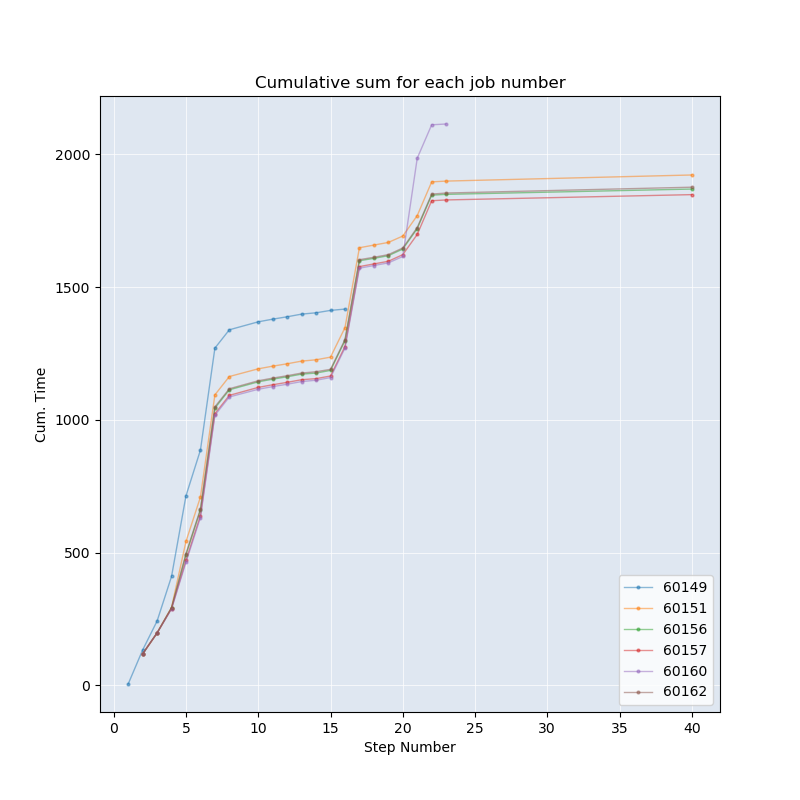

In [34]:
indexes = list(df_final_fig.index.unique())
indexes.pop(0)

fig = plt.figure(figsize=(8,8,))
#fig.patch.set_facecolor('#E0E0E0')
#fig.patch.set_alpha(0.7)

ax = fig.add_subplot(1,1,1)
ax.grid(True, linewidth=0.5, color='#ffffff', linestyle='-')

for idx in indexes:
    ax.plot(df_final_fig.loc[idx]['StepNumber'], df_final_fig.loc[idx]['StepCountSum'], 
             '-o', alpha=0.5, markersize=2, linewidth=1)
    
ax.set_xlabel("Step Number")
ax.set_ylabel("Cum. Time")    
ax.legend(indexes, loc='lower right')
ax.set_title('Cumulative sum for each job number')
ax.set_facecolor('lightsteelblue')
ax.patch.set_alpha(0.4)